# Actividad Integradora Minería de Datos

### Importando el Dataset

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Cargar el dataset
df = pd.read_csv('adult_data.csv')

# Mostrar las primeras 5 filas
df.head()

,Age;Work_Class;fnlwgt;Education;Eduction_num;Marital_status;Occupation;Relationship;Rice;Sex;Capital_gain;Capital_loss;Hours_per_week;Native_country;Class
0,39; State-gov;77516; Bachelors;13; Never-marri...
1,50; Self-emp-not-inc;83311; Bachelors;13; Marr...
2,38; Private;215646; HS-grad;9; Divorced; Handl...
3,53; Private;234721; 11th;7; Married-civ-spouse...
4,28; Private;338409; Bachelors;13; Married-civ-...


In [4]:
df.shape

(32561, 1)

 Parece que hay un error en la carga del archivo, voy a transformarlo a excel para trabajarlo mejor

In [5]:
# Cargamos el archivo nuevamente
df = pd.read_excel('adult_data.xlsx')

df.head()

,Age,Work_Class,fnlwgt,Education,Eduction_num,Marital_status,Occupation,Relationship,Rice,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Class
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,F,0.0,0.0,40.0,Cuba,<=50K


In [6]:
df.shape

(32561, 15)

In [7]:
df.describe() 


,Age,fnlwgt,Eduction_num,Capital_gain,Capital_loss,Hours_per_week
count,32561.000000,3.256100e+04,32531.000000,32551.000000,32549.000000,32545.000000
mean,38.589325,1.897784e+05,10.080815,1077.979908,87.336016,40.436718
std,13.693699,1.055500e+05,2.572948,7386.402293,403.031007,12.347939
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,190.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Verificación de datos

In [8]:
# Revisar valores nulos en el DataFrame
null_values = df.isnull().sum()
print(null_values)

Age                  0
Work_Class        1836
fnlwgt               0
Education            0
Eduction_num        30
Marital_status       0
Occupation        1843
Relationship         0
Rice                 0
Sex                  0
Capital_gain        10
Capital_loss        12
Hours_per_week      16
Native_country     583
Class                0
dtype: int64


In [9]:
# Reemplazo de valores faltantes

# Completar los valores faltantes de los atributos 'Eduction_num' y 'Capital_Loss' con el valor mínimo
df['Eduction_num'].fillna(df['Eduction_num'].min(), inplace=True)
df['Capital_loss'].fillna(df['Capital_loss'].min(), inplace=True)

# Completar el resto de los atributos con su correspondiente valor promedio
columns_with_na = ['Work_Class', 'Occupation', 'Capital_gain', 'Hours_per_week', 'Native_country']
for column in columns_with_na:
    if df[column].dtype == 'float64':  # Si es numérico, completar con el promedio
        df[column].fillna(df[column].mean(), inplace=True)
    else:  # Si es categórico, completar con la moda (valor más frecuente)
        df[column].fillna(df[column].mode()[0], inplace=True)

# Verificación de valores faltantes después de la imputación
missing_values_after = df.isnull().sum()
missing_values_after


Age               0
Work_Class        0
fnlwgt            0
Education         0
Eduction_num      0
Marital_status    0
Occupation        0
Relationship      0
Rice              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Class             0
dtype: int64

#### Normalización

In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [12]:

# Generación de atributos nuevos para resolver la normalización y posibles valores inválidos (outliers)
# Normalización de las columnas Capital_gain y Capital_loss utilizando MinMaxScaler
scaler_minmax = MinMaxScaler()
df[['Capital_gain_normalized', 'Capital_loss_normalized']] = scaler_minmax.fit_transform(df[['Capital_gain', 'Capital_loss']])

# Estandarización de Hours_per_week utilizando StandardScaler
scaler_standard = StandardScaler()
df['Hours_per_week_standardized'] = scaler_standard.fit_transform(df[['Hours_per_week']])

# Visualización de las primeras filas del DataFrame para verificar los nuevos atributos generados
df[['Capital_gain_normalized', 'Capital_loss_normalized', 'Hours_per_week_standardized']].head()


,Capital_gain_normalized,Capital_loss_normalized,Hours_per_week_standardized
0,0.02174,0.0,-0.035377
1,0.00000,0.0,-2.222548
2,0.00000,0.0,-0.035377
3,0.00000,0.0,-0.035377
4,0.00000,0.0,-0.035377


Se han generado los siguientes nuevos atributos para facilitar un análisis más robusto:

Capital_gain_normalized y Capital_loss_normalized: Estas columnas representan los valores de Capital_gain y Capital_loss normalizados en un rango entre 0 y 1, lo cual facilita el uso de estos valores en algoritmos de aprendizaje automático que son sensibles a la escala de los datos.

Hours_per_week_standardized: Esta columna contiene el valor de Hours_per_week estandarizado, es decir, transformado para tener media 0 y desviación estándar 1, lo cual es útil para comparar esta variable con otras variables estandarizadas.

In [11]:
# Verificación de valores únicos por columna para identificar posibles valores inválidos
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")


Work_Class: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
Education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Marital_status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Occupation: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Relationship: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Rice: [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
Sex: ['Male' 'F' 'Female' 'M']
Native_country: [' United-States' ' Cuba' ' Jamaica' ' Ind

Espacios en blanco al inicio de las categorías: Las columnas Work_Class, Education, Marital_status, Occupation, Native_country, y Class tienen espacios en blanco al inicio de cada valor. Esto puede causar problemas al realizar análisis o comparaciones. Para solucionarlo, podemos eliminar los espacios en blanco en estas columnas.

In [17]:
# Eliminar espacios en blanco al inicio y al final de las categorías en columnas de tipo "object"
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


Inconsistencia en la codificación de Sex: Se observan valores Male y M para masculino, así como Female y F para femenino. Es necesario unificar estos valores para que solo haya dos categorías consistentes, Male y Female, por ejemplo.

In [18]:
# Unificar valores de la columna "Sex"
df['Sex'] = df['Sex'].replace({'M': 'Male', 'F': 'Female'})


Verificación de categorías adicionales: Las demás columnas parecen tener valores consistentes dentro de las categorías esperadas. Sin embargo, conviene revisar cualquier valor atípico en caso de actualizaciones o futuras limpiezas.

La columna 'Education_num' está mal escrita

In [12]:
# Código para renombrar la columna 'Eduction_num' a 'Education_num'
df.rename(columns={'Eduction_num': 'Education_num'}, inplace=True)

# Confirmar el cambio
df.columns.tolist()


['Age',
 'Work_Class',
 'fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Rice',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Class']

In [19]:
# Relación entre Education y Education_num
df[['Education', 'Education_num']].drop_duplicates().sort_values(by='Education_num')


,Education,Education_num
23255,Doctorate,1.0
1755,Bachelors,1.0
224,Preschool,1.0
17575,10th,1.0
4915,11th,1.0
2395,12th,1.0
2955,Some-college,1.0
7,HS-grad,1.0
10135,Masters,1.0
160,1st-4th,2.0


Inconsistencias en Education_num para el mismo nivel educativo:

Varios niveles educativos (Doctorate, Bachelors, Preschool, 10th, 11th, 12th, Some-college, HS-grad, Masters) aparecen asociados incorrectamente con el valor 1.0 en Education_num.

Estos valores deben ser corregidos para que cada nivel educativo en Education tenga un único valor en Education_num que corresponda a su jerarquía educativa.
Relación Jerárquica Esperada:

Idealmente, Education_num debería representar una escala jerárquica ascendente, donde un valor numérico más alto indica un nivel educativo más avanzado. La relación correcta parece ser, por ejemplo, Preschool asociado con el menor valor y Doctorate con el mayor.

In [22]:
# Diccionario de mapeo basado en la jerarquía correcta
education_mapping = {
    'Preschool': 1, '1st-4th': 2, '5th-6th': 3, '7th-8th': 4,
    '9th': 5, '10th': 6, '11th': 7, '12th': 8, 'HS-grad': 9,
    'Some-college': 10, 'Assoc-voc': 11, 'Assoc-acdm': 12,
    'Bachelors': 13, 'Masters': 14, 'Prof-school': 15, 'Doctorate': 16
}

# Aplicar el mapeo para corregir 'Education_num'
df['Education_num'] = df['Education'].map(education_mapping)

# Relación entre Education y Education_num
df[['Education', 'Education_num']].drop_duplicates().sort_values(by='Education_num')



,Education,Education_num
224,Preschool,1
160,1st-4th,2
56,5th-6th,3
15,7th-8th,4
6,9th,5
77,10th,6
3,11th,7
415,12th,8
2,HS-grad,9
10,Some-college,10


Este mapeo asegura que cada nivel educativo esté correctamente representado por un solo valor en Education_num, eliminando las inconsistencias observadas. Esto permitirá un análisis más preciso en los pasos posteriores.

In [15]:
# Discretización del atributo Hours_per_week en tres formas distintas

# Discretización en cuatro intervalos de igual tamaño
df['Hours_per_week_bins_equal'] = pd.cut(df['Hours_per_week'], bins=4, labels=["Very Low", "Low", "High", "Very High"])

# Discretización en intervalos específicos [1..10], [11..50], [51..70], [71..MAX]
df['Hours_per_week_bins_custom'] = pd.cut(df['Hours_per_week'], bins=[1, 10, 50, 70, df['Hours_per_week'].max()], 
                                          labels=["1-10", "11-50", "51-70", "71-MAX"])

# Mostrar las primeras filas del DataFrame para verificar las nuevas columnas de discretización
df[['Hours_per_week', 'Hours_per_week_bins_equal', 'Hours_per_week_bins_custom']].head()


,Hours_per_week,Hours_per_week_bins_equal,Hours_per_week_bins_custom
0,40.0,Low,11-50
1,13.0,Very Low,11-50
2,40.0,Low,11-50
3,40.0,Low,11-50
4,40.0,Low,11-50


Se han creado dos nuevas columnas de discretización para el atributo Hours_per_week:

Hours_per_week_bins_equal: Divide las horas trabajadas por semana en cuatro intervalos de tamaño igual, etiquetados como "Very Low", "Low", "High" y "Very High".

Hours_per_week_bins_custom: Divide las horas en intervalos específicos: [1..10], [11..50], [51..70], y [71..MAX], que reflejan rangos específicos según el criterio indicado.

Estos atributos permiten comparar cómo se distribuyen las horas semanales bajo diferentes esquemas de discretización.

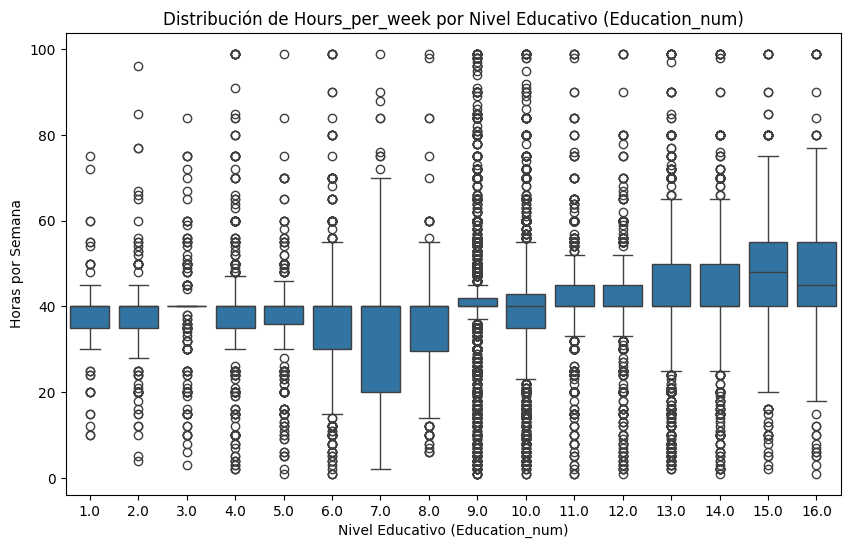

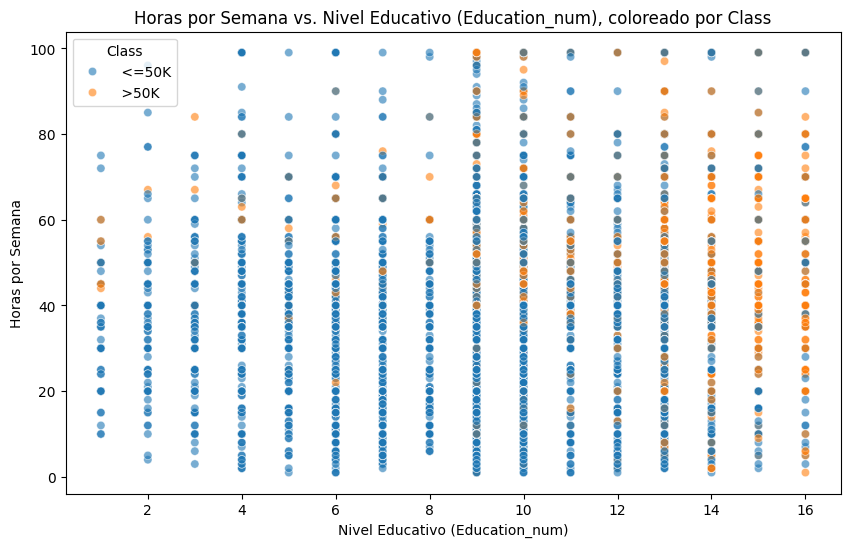

In [ ]:

# 1. Boxplot de Hours_per_week en función de Eduction_num
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education_num', y='Hours_per_week', data=df)
plt.title('Distribución de Hours_per_week por Nivel Educativo (Education_num)')
plt.xlabel('Nivel Educativo (Education_num)')
plt.ylabel('Horas por Semana')
plt.show()

# 2. Scatter plot entre Hours_per_week y Eduction_num, coloreado por Class
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Education_num', y='Hours_per_week', hue='Class', data=df, alpha=0.6)
plt.title('Horas por Semana vs. Nivel Educativo (Education_num), coloreado por Class')
plt.xlabel('Nivel Educativo (Education_num)')
plt.ylabel('Horas por Semana')
plt.legend(title='Class')
plt.show()


### Boxplot de Hours_per_week por Education_num

Distribución de Horas por Nivel Educativo:

Los niveles educativos más bajos (1.0 hasta 8.0, correspondientes a niveles como Preschool hasta 12th) muestran distribuciones de horas trabajadas bastante consistentes, con la mayoría de los valores alrededor de las 40 horas por semana.
A partir del nivel 9.0 (HS-grad) y en adelante, hay una ligera tendencia a que los niveles educativos más altos tengan distribuciones de horas un poco más dispersas. Esto puede sugerir que, en niveles de educación más avanzados, algunos individuos tienen la posibilidad de trabajar menos o más horas en comparación con niveles de educación básica.

Valores Atípicos:

A lo largo de todos los niveles educativos, observamos valores atípicos tanto en las horas trabajadas muy bajas (cercanas a 0) como en las altas (más de 80 horas semanales). Esto podría indicar la presencia de ciertos empleos o condiciones laborales que requieren un tiempo de trabajo muy variable, independientemente del nivel educativo.
En niveles de educación avanzada (especialmente Masters, Prof-school, y Doctorate), algunos individuos reportan más de 60 horas por semana, lo cual podría estar relacionado con ocupaciones de alta demanda.

 ### Diagrama de Dispersión entre Hours_per_week y Education_num coloreado por Class

Patrón de Ganancia Anual (Class) por Nivel Educativo:

Observamos que, en general, los individuos con mayores niveles educativos (Education_num altos) tienden a estar representados en la clase >50K, especialmente cuando también trabajan un número significativo de horas por semana (más de 40).

Para niveles educativos bajos, la mayoría de los puntos pertenecen a la clase <=50K, lo que sugiere que el nivel educativo es un factor importante en la probabilidad de ganar más de 50K USD anuales.

Impacto de las Horas Trabajadas en los Ingresos:

Para aquellos con niveles educativos intermedios (entre Some-college y Bachelors), trabajar más horas parece estar relacionado con una mayor probabilidad de pertenecer a la clase >50K.

Sin embargo, para los niveles educativos más bajos, incluso aquellos que trabajan muchas horas semanales (por ejemplo, más de 40) generalmente caen en la clase <=50K. Esto podría indicar que el nivel educativo tiene un rol más determinante en los ingresos anuales que las horas trabajadas en estos niveles.

Para enriquecer el análisis, vamos a incluir la variable Edad en la visualización y en el análisis. Esto nos permitirá ver si hay una relación entre la edad, el nivel educativo, las horas trabajadas y los ingresos anuales. Podemos usar gráficos de dispersión adicionales para observar patrones.

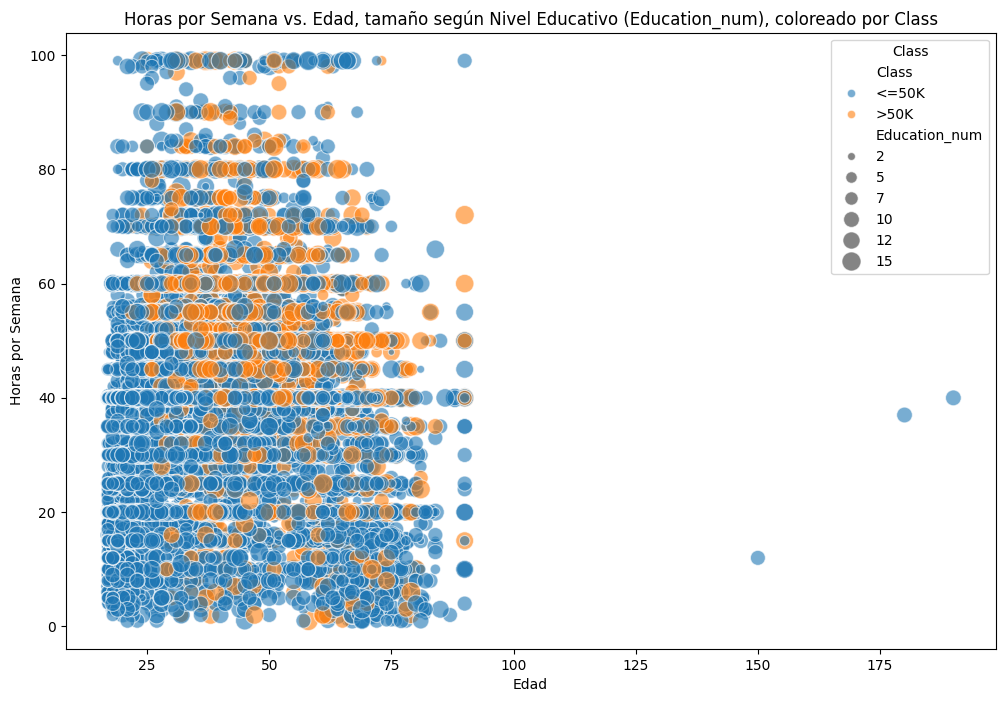

In [23]:

# Scatter plot con Edad, Hours_per_week y Education_num, coloreado por Class
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Hours_per_week', hue='Class', size='Education_num', sizes=(20, 200), data=df, alpha=0.6)
plt.title('Horas por Semana vs. Edad, tamaño según Nivel Educativo (Education_num), coloreado por Class')
plt.xlabel('Edad')
plt.ylabel('Horas por Semana')
plt.legend(title='Class')
plt.show()


#### Distribución General:

La mayoría de las personas trabajan entre 30 y 50 horas por semana, independientemente de su edad o nivel educativo.
Las personas en este rango de horas trabajadas presentan una mezcla de clases de ingreso (<=50K y >50K), lo que sugiere que otros factores, como el nivel educativo, juegan un papel importante en la determinación de los ingresos.

#### Relación entre Edad y Clase de Ingreso:

A medida que aumenta la edad (especialmente entre los 30 y 60 años), es más probable que algunos individuos se encuentren en la clase >50K (naranja), aunque esto depende también del nivel educativo.
Las personas más jóvenes, especialmente menores de 30 años, están en su mayoría en la clase <=50K. Esto podría estar relacionado con la falta de experiencia o un nivel educativo aún no completo.

#### Nivel Educativo (Tamaño de los Puntos) y su Impacto en los Ingresos:

Los puntos más grandes (que indican niveles educativos más altos) tienden a estar asociados con la clase >50K (color naranja), especialmente para aquellos que trabajan más de 40 horas a la semana.
En contraste, aquellos con niveles educativos más bajos (puntos más pequeños) están predominantemente en la clase <=50K, independientemente de la edad o las horas trabajadas.

#### Valores Atípicos en Edad:

Hay algunos valores de edad extremadamente altos (por encima de los 100 años) que son probablemente errores de entrada o atípicos en el dataset. Estos valores deberían ser revisados o eliminados en un proceso de limpieza adicional.

#### Impacto Combinado de Edad, Horas Trabajadas y Nivel Educativo:

Para personas con niveles educativos altos (por ejemplo, Bachelors, Masters, Doctorate), trabajar más de 40 horas por semana y tener una edad entre 30 y 60 años parece aumentar significativamente la probabilidad de estar en la clase >50K.
Sin embargo, para aquellos con niveles educativos bajos, el aumento en la edad y las horas trabajadas no parece tener el mismo impacto positivo en los ingresos.

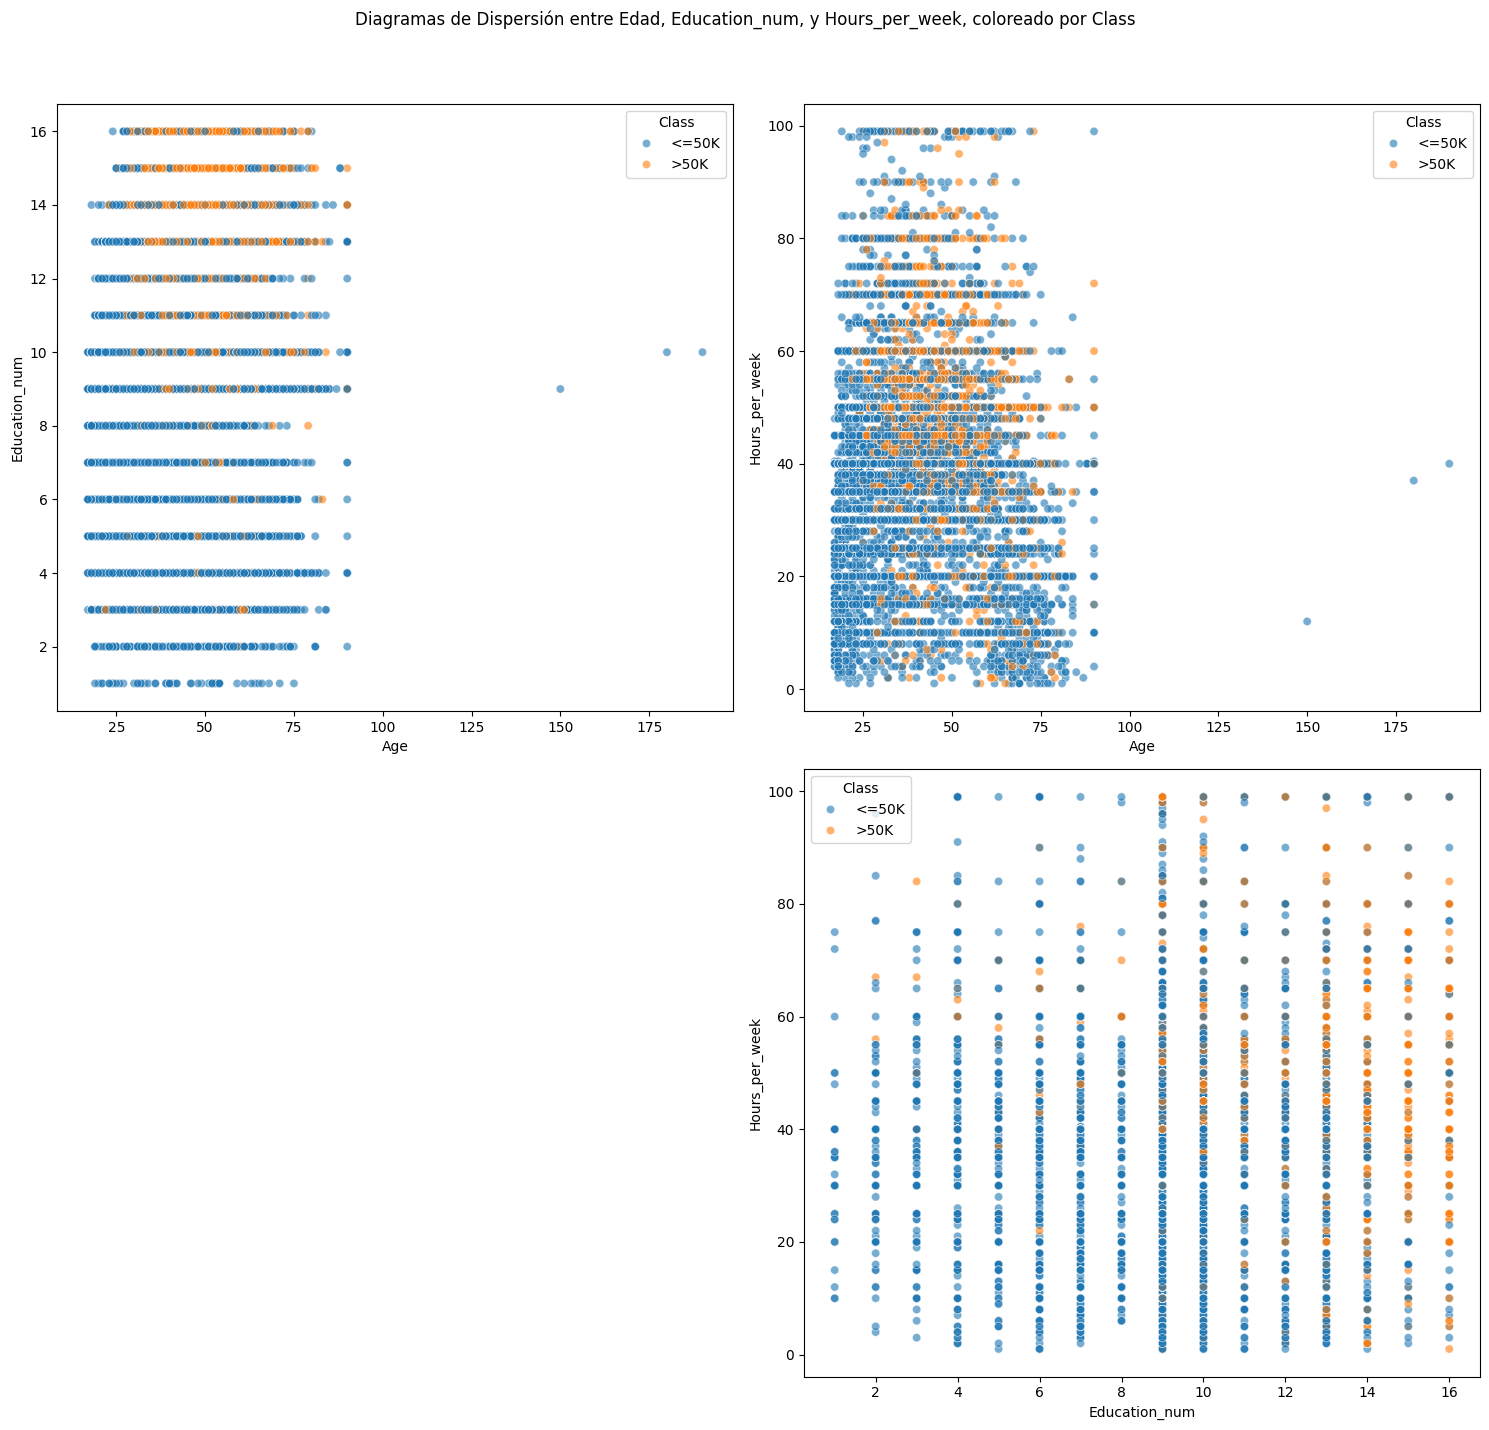

In [24]:

# Lista de atributos seleccionados para los scatter plots
attributes = ['Age', 'Education_num', 'Hours_per_week']
n = len(attributes)

# Generar todos los posibles gráficos de dispersión entre los atributos seleccionados
plt.figure(figsize=(15, 15))
for i in range(n):
    for j in range(i + 1, n):
        plt.subplot(n - 1, n - 1, i * (n - 1) + j)
        sns.scatterplot(x=attributes[i], y=attributes[j], hue='Class', data=df, alpha=0.6)
        plt.xlabel(attributes[i])
        plt.ylabel(attributes[j])
        plt.legend(title='Class')

plt.suptitle('Diagramas de Dispersión entre Edad, Education_num, y Hours_per_week, coloreado por Class')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Análisis de atributos seleccionados 

#### a. ¿Qué puedes decir de las edades con respecto a la ganancia anual?
Observación: La mayoría de las personas más jóvenes (menores de 30 años) tienden a estar en la clase <=50K. A medida que la edad aumenta, especialmente entre los 30 y 60 años, la proporción de personas en la clase >50K incrementa, en particular para aquellos con niveles educativos altos.

Conclusión: La edad parece estar relacionada con el potencial de ingresos, ya que las personas en edades laborales intermedias tienen mayores probabilidades de pertenecer a la clase >50K, probablemente debido a la acumulación de experiencia y estabilidad en sus carreras.

#### b. ¿Puedes afirmar que las personas que poseen un nivel educativo por debajo de 8 y que trabajan menos de 40 horas no ganan más de 50 mil dólares por año?
Observación: En los gráficos, las personas con Education_num por debajo de 8 (lo que representa niveles educativos más bajos) que además trabajan menos de 40 horas por semana se encuentran casi exclusivamente en la clase <=50K.

Conclusión: Sí, se puede afirmar con bastante seguridad que las personas con un nivel educativo por debajo de 8 y que trabajan menos de 40 horas no suelen ganar más de 50,000 USD anuales. Esto sugiere que tanto el nivel educativo bajo como el número reducido de horas trabajadas limitan el potencial de ingresos.

#### c. ¿Existe alguna relación entre el nivel educativo y el hecho de ganar más de 50 mil dólares por año?
Observación: Hay una clara tendencia de que a medida que aumenta el Education_num (nivel educativo), aumenta la probabilidad de pertenecer a la clase >50K. En los gráficos de dispersión, las personas con Education_num altos (por ejemplo, Bachelors y superior) están más representadas en la clase >50K.

Conclusión: Sí, existe una relación positiva entre el nivel educativo y la probabilidad de ganar más de 50,000 USD. Esto sugiere que una educación avanzada puede contribuir significativamente a incrementar los ingresos.

#### d. ¿Hay alguna relación con la cantidad de horas semanales trabajadas?
Observación: En general, trabajar más horas está asociado con una mayor probabilidad de pertenecer a la clase >50K, especialmente para personas con niveles educativos intermedios o altos. Sin embargo, entre aquellos con educación baja, aumentar las horas trabajadas no parece tener un impacto tan fuerte en los ingresos.

Conclusión: Sí, hay una relación entre las horas trabajadas y la ganancia anual, pero esta relación está condicionada por el nivel educativo. Para aquellos con educación media o alta, trabajar más horas incrementa la probabilidad de estar en la clase >50K.

### Link al video de la presentación 

https://drive.google.com/drive/folders/1xgb0v51-HBKInP-6-z4TAsc3LC1jMuZW?usp=sharing